# BY: Mohamed Ashraf Gaber
### This is a model predict what is the number of a handwritten digits.
#### The Data called MNIST dataset and it has two versions.
#### The first one has 70000 instance (28 * 28).
#### And the second on has 1797 instance (8 * 8).
#### Here I used the large one.
### Importing libraries we will need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import fetch_openml

### Loading the data.

In [2]:
mnist = fetch_openml('mnist_784', version=1)

print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


#### Setting X to the features and y for the label.

In [3]:
X, y = mnist["data"], mnist["target"]

#### Printing the shape of X and y.

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Some exploratory data and data visualization.

5


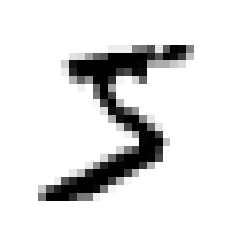

In [5]:
index = 0

some_digit = X[index]
some_digit = some_digit.reshape(28, 28)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')

print(y[index])
plt.show()

0


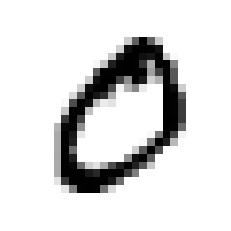

In [6]:
index = 1

some_digit = X[index]
some_digit = some_digit.reshape(28, 28)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')

print(y[index])
plt.show()

4


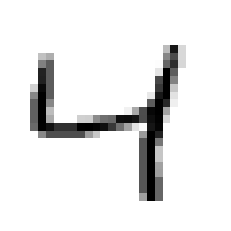

In [7]:
index = 2

some_digit = X[index]
some_digit = some_digit.reshape(28, 28)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')

print(y[index])
plt.show()

1


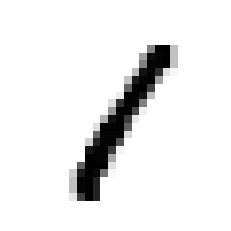

In [8]:
index = 3

some_digit = X[index]
some_digit = some_digit.reshape(28, 28)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')

print(y[index])
plt.show()

2


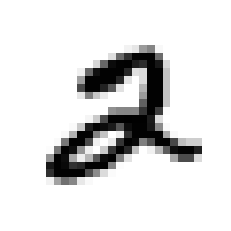

In [9]:
index = 5

some_digit = X[index]
some_digit = some_digit.reshape(28, 28)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')

print(y[index])
plt.show()

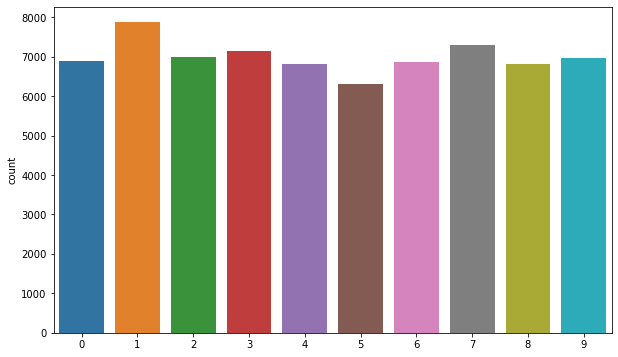

In [10]:
plt.figure(figsize=(10, 6))

sns.countplot(y)

### Data Preprocessing.
#### This function prepare the data to be able to use Tensorflow (CNN).

In [11]:
num_classes = 10  # The number of classes in the label column.
img_rows, img_cols = 28, 28  # The dimension of each image.

def data_prep(x, y):
    # Reshaping x to correct dimensions to use (CNN).
    out_x = x.reshape(x.shape[0], img_rows, img_cols, 1)
    out_x = out_x / 255  # Dividing each image by 255 to scale the data.
    
    # Converting y to one-hot encoded.
    out_y = to_categorical(y, num_classes)
    
    # Returning the new x and y.
    return out_x, out_y

### Splitting the data into a training set and testing set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, y_train = data_prep(X_train, y_train)
X_test, y_test = data_prep(X_test, y_test)

### Building the Sequential model.

In [13]:
model = Sequential()  # Creating a Sequential object.

# The input Convolution layer will have 20 filters, activation is relu, kernel size 3x3 and input_shape=[28, 28, 1].
model.add(Conv2D(20, activation='relu', kernel_size=(3, 3), input_shape=(img_rows, img_cols, 1)))

# The first and second Convolution hidden layers will have 25 filters, relu activation and kernel size 3x3.
model.add(Conv2D(25, activation='relu', kernel_size=(3, 3)))
model.add(Conv2D(25, activation='relu', kernel_size=(3, 3)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))  # Using the Dense layer with 128 neurons and relu activation.
model.add(Dense(64, activation='relu'))  # Using the Dense layer with 64 neurons and relu activation.
model.add(Dense(32, activation='relu'))  # Using the Dense layer with 32 neurons and relu activation.

# The output layer will have 10 neurons and the activation will be softmax.
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model with categorical crossentropy as loss and adam as optimizer.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Using early stopping to prevent over fitting
early_stopping = EarlyStopping(patience=15)

### Fitting the model.

In [15]:
# Using X_test and y_test as validation data, the batch size equal to 128 and epochs equal 100 maximum.
model.fit(x=X_train, y=y_train, verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stopping],
          batch_size=128, epochs=100)

Epoch 1/100
383/383 [==============================] - 3s 8ms/step - loss: 0.2324 - accuracy: 0.9281 - val_loss: 0.0794 - val_accuracy: 0.9759
Epoch 2/100
383/383 [==============================] - 3s 7ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 3/100
383/383 [==============================] - 3s 7ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0426 - val_accuracy: 0.9865
Epoch 4/100
383/383 [==============================] - 3s 7ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0537 - val_accuracy: 0.9850
Epoch 5/100
383/383 [==============================] - 3s 7ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0512 - val_accuracy: 0.9862
Epoch 6/100
383/383 [==============================] - 3s 7ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0461 - val_accuracy: 0.9873
Epoch 7/100
383/383 [==============================] - 3s 7ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0496 - val_accuracy: 0.9881

### Visualizing the loss for the training and validation sets.

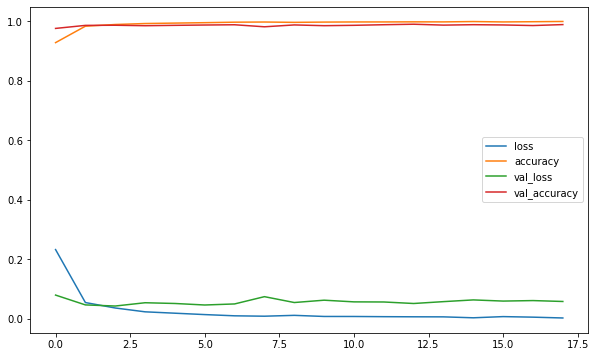

In [16]:
losses = pd.DataFrame(model.history.history)

losses.plot(figsize=(10, 6))

#### The model has 99.97% accuracy on training set.

In [17]:
model.evaluate(X_train, y_train)

1532/1532 [==============================] - 5s 3ms/step - loss: 7.9611e-04 - accuracy: 0.9997


[0.0007961128139868379, 0.9996938705444336]

#### The model has 98.87% accuracy on test set.

In [18]:
model.evaluate(X_test, y_test)

657/657 [==============================] - 2s 3ms/step - loss: 0.0579 - accuracy: 0.9887


[0.057917822152376175, 0.9887142777442932]